Loading necessary libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset :

In [4]:
df = pd.read_csv("titanic_dataset (1).csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.shape

(891, 12)

There are 891 rows and 12 columns in the dataset

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Finding the unique values

In [8]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Checking for Null Values :

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are no null values

Preprocessing the Data

Checking the distribution of survived

In [12]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

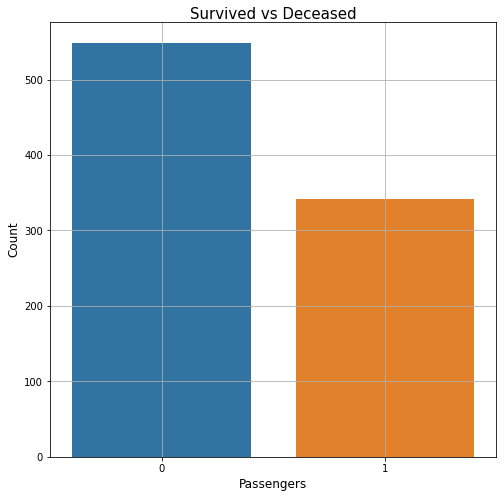

In [15]:
plt.figure(figsize=(8,8))
sns.countplot(x = df["Survived"])
plt.title("Survived vs Deceased", fontsize = 15, pad=0.5 )
plt.xlabel("Passengers", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.grid()

In [16]:
# Creating a copy of the original Dataset as backup

df1 = df.copy()
df2 = df1.copy()

In [17]:
# Using Label Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns:
    df[col] = le.fit_transform(df[col])
    
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,2,108,1,28,1,0,523,18,147,2
1,1,1,0,190,0,51,1,0,596,207,81,0
2,2,1,2,353,0,34,0,0,669,41,147,2
3,3,1,0,272,0,47,1,0,49,189,55,2
4,4,0,2,15,1,47,0,0,472,43,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,1,548,1,35,0,0,101,85,147,2
887,887,1,0,303,0,24,0,0,14,153,30,2
888,888,0,2,413,0,88,1,2,675,131,147,2
889,889,1,0,81,1,34,0,0,8,153,60,0


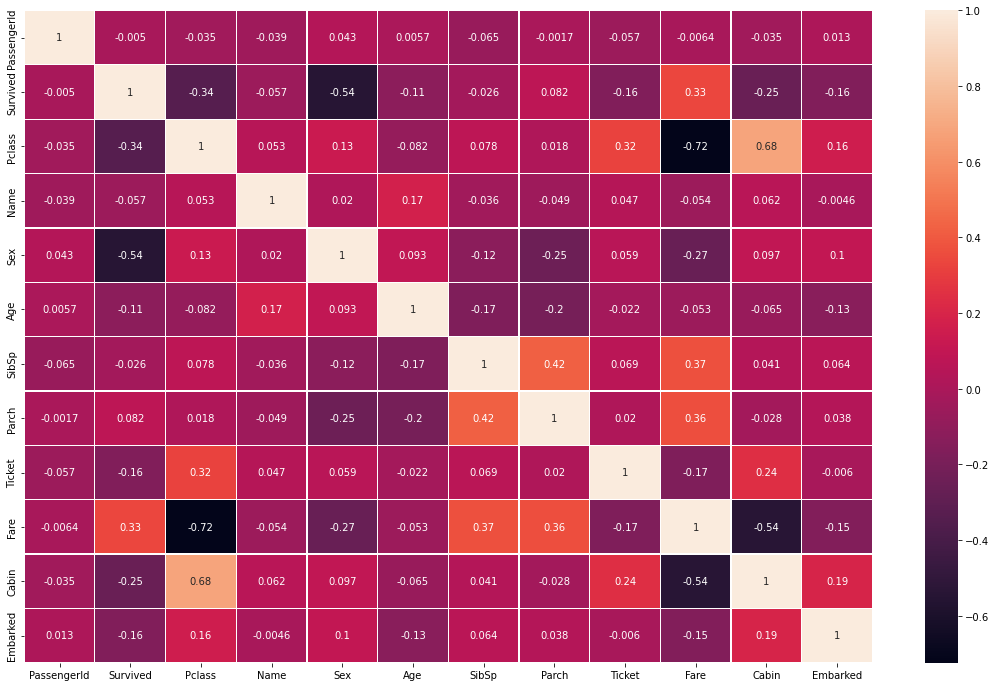

In [18]:
## Making a Heatmap of the Encoded data

cor = df.corr()
plt.figure(figsize=(19,12))
sns.heatmap(cor, annot=True,linewidths=0.2);

Defining our X and y variables

In [19]:
# We'll take Survived as y variable as we've to classify the passengers.

X = df.drop('Survived' , axis=1)
y = df['Survived']

In [20]:
## Performing Chi2 test to see if there are any irrelavent features which we could removee before making various models.
from sklearn.feature_selection import chi2

chi_scores = chi2(X,y)

chi_scores

(array([3.32037886e+00, 5.44658660e+01, 4.35568915e+02, 9.27024470e+01,
        1.50210135e+02, 1.23604038e+00, 1.00974991e+01, 2.87165547e+03,
        4.62696372e+03, 5.73925858e+02, 9.75545583e+00]),
 array([6.84260587e-002, 1.58171493e-013, 9.97314604e-097, 6.07783826e-022,
        1.55965801e-034, 2.66235537e-001, 1.48470676e-003, 0.00000000e+000,
        0.00000000e+000, 7.85854612e-127, 1.78791305e-003]))

In [21]:
p_val = pd.Series(chi_scores[1],index = X.columns)
p_val

PassengerId     6.842606e-02
Pclass          1.581715e-13
Name            9.973146e-97
Sex             6.077838e-22
Age             1.559658e-34
SibSp           2.662355e-01
Parch           1.484707e-03
Ticket          0.000000e+00
Fare            0.000000e+00
Cabin          7.858546e-127
Embarked        1.787913e-03
dtype: float64

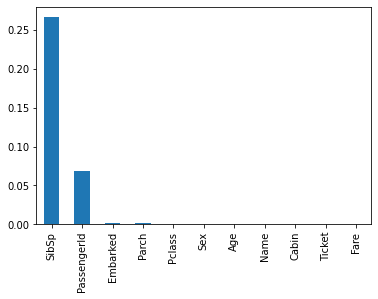

In [22]:
# Rearranging the p values in Decending order and plotting a bar graph

p_val.sort_values(ascending = False , inplace = True)

p_val.plot.bar();

In [23]:
X = X.drop(['SibSp' ,'PassengerId'] , axis=1)
X

,Pclass,Name,Sex,Age,Parch,Ticket,Fare,Cabin,Embarked
0,2,108,1,28,0,523,18,147,2
1,0,190,0,51,0,596,207,81,0
2,2,353,0,34,0,669,41,147,2
3,0,272,0,47,0,49,189,55,2
4,2,15,1,47,0,472,43,147,2
...,...,...,...,...,...,...,...,...,...
886,1,548,1,35,0,101,85,147,2
887,0,303,0,24,0,14,153,30,2
888,2,413,0,88,2,675,131,147,2
889,0,81,1,34,0,8,153,60,0


In [24]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(X,y,test_size = 0.25 , random_state = 10)

Making Various Models

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

1. Logistic Regression Classification :

In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver="liblinear")
lr.fit(x_train,y_train)
prediction = lr.predict(x_test)

In [27]:
print(f"Accuracy score = {accuracy_score(y_test,prediction)}")
print("\nf1_score is :" ,f1_score(y_test,prediction))
print(f"\nconfusion_matrix = \n{confusion_matrix(y_test,prediction)}")

Accuracy score = 0.8385650224215246

f1_score is : 0.7499999999999999

confusion_matrix = 
[[133  14]
 [ 22  54]]


Accuracy Score = 83.85 %

2. KNN Classification :

In [28]:
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'accuracy')

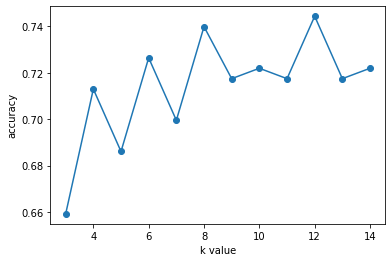

In [29]:
acc_val = []
neighbors = np.arange(3,15) # taking values from 3-15

# creating a loop to create knn model for each k value

for k in neighbors:
    #creating an instance for knn
    classifier = KNeighborsClassifier(n_neighbors=k,metric = "minkowski") # mentioning the k values , 
    # and type of distance measurement
    classifier.fit(x_train,y_train)
    predicts = classifier.predict(x_test)
    # Next, we append the accuracy values to the empty list, to find the max accuracy
    acc = accuracy_score(y_test,predicts)
    acc_val.append(acc)
    
plt.plot(neighbors,acc_val,"o-")
plt.xlabel("k value")
plt.ylabel("accuracy")

In [34]:
classifer = KNeighborsClassifier(n_neighbors=12,metric = "minkowski") 
classifer.fit(x_train,y_train)
predict1 = classifer.predict(x_test)

print(f"Accuracy score = {accuracy_score(y_test,predict1)}")
print("\nf1_score is :" ,f1_score(y_test,predict1))
print(f"\nconfusion_matrix = \n{confusion_matrix(y_test,predict1)}")

Accuracy score = 0.7443946188340808

f1_score is : 0.5581395348837208

confusion_matrix = 
[[130  17]
 [ 40  36]]


3. SVM Classification :

In [35]:
from sklearn.svm import SVC

svm = SVC(random_state=42, gamma="auto")
svm.fit(x_train,y_train)
predict2 = svm.predict(x_test)

print(f"Accuracy score = {accuracy_score(y_test,predict2)}")
print("\nf1_score is :" ,f1_score(y_test,predict2))
print(f"\nconfusion_matrix = \n{confusion_matrix(y_test,predict2)}")

Accuracy score = 0.6681614349775785

f1_score is : 0.09756097560975609

confusion_matrix = 
[[145   2]
 [ 72   4]]


Accuracy = 66.81%

4. Decision Tree Classification :

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
predict3 = dt.predict(x_test)

print(f"Accuracy score = {accuracy_score(y_test,predict3)}")
print("\nf1_score is :" ,f1_score(y_test,predict3))
print(f"\nconfusion_matrix = \n{confusion_matrix(y_test,predict3)}")

Accuracy score = 0.820627802690583

f1_score is : 0.7368421052631579

confusion_matrix = 
[[127  20]
 [ 20  56]]


Accuracy=82.06 %

5. Random Forest Classification :

In [37]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(x_train,y_train)
predict4 = rfc.predict(x_test)

print(f"Accuracy score = {accuracy_score(y_test,predict4)}")
print("\nf1_score is :" ,f1_score(y_test,predict4))
print(f"\nconfusion_matrix = \n{confusion_matrix(y_test,predict4)}")

Accuracy score = 0.8565022421524664

f1_score is : 0.7746478873239436

confusion_matrix = 
[[136  11]
 [ 21  55]]


Accuracy = 85.65 %

6. Naive Bayes Classification :

In [38]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)
predict5 = nb.predict(x_test)

print(f"Accuracy score = {accuracy_score(y_test,predict5)}")
print("\nf1_score is :" ,f1_score(y_test,predict5))
print(f"\nconfusion_matrix = \n{confusion_matrix(y_test,predict5)}")

Accuracy score = 0.8161434977578476

f1_score is : 0.7248322147651005

confusion_matrix = 
[[128  19]
 [ 22  54]]


Accuracy = 81.61 %

7. Gradient Boosting Classifier Model :

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predict6 = gbc.predict(x_test)

print(f"Accuracy score = {accuracy_score(y_test,predict6)}")
print("\nf1_score is :" ,f1_score(y_test,predict6))
print(f"\nconfusion_matrix = \n{confusion_matrix(y_test,predict6)}")

Accuracy score = 0.8385650224215246

f1_score is : 0.7534246575342466

confusion_matrix = 
[[132  15]
 [ 21  55]]


Accuracy = 83.85 %